In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


import warnings
warnings.filterwarnings('ignore')




/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
df = pd.read_csv("/content/stroke.zip")


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
df.columns = df.columns.str.lower()


In [8]:
df.shape

(5110, 12)

In [22]:
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**HEAT MAP**

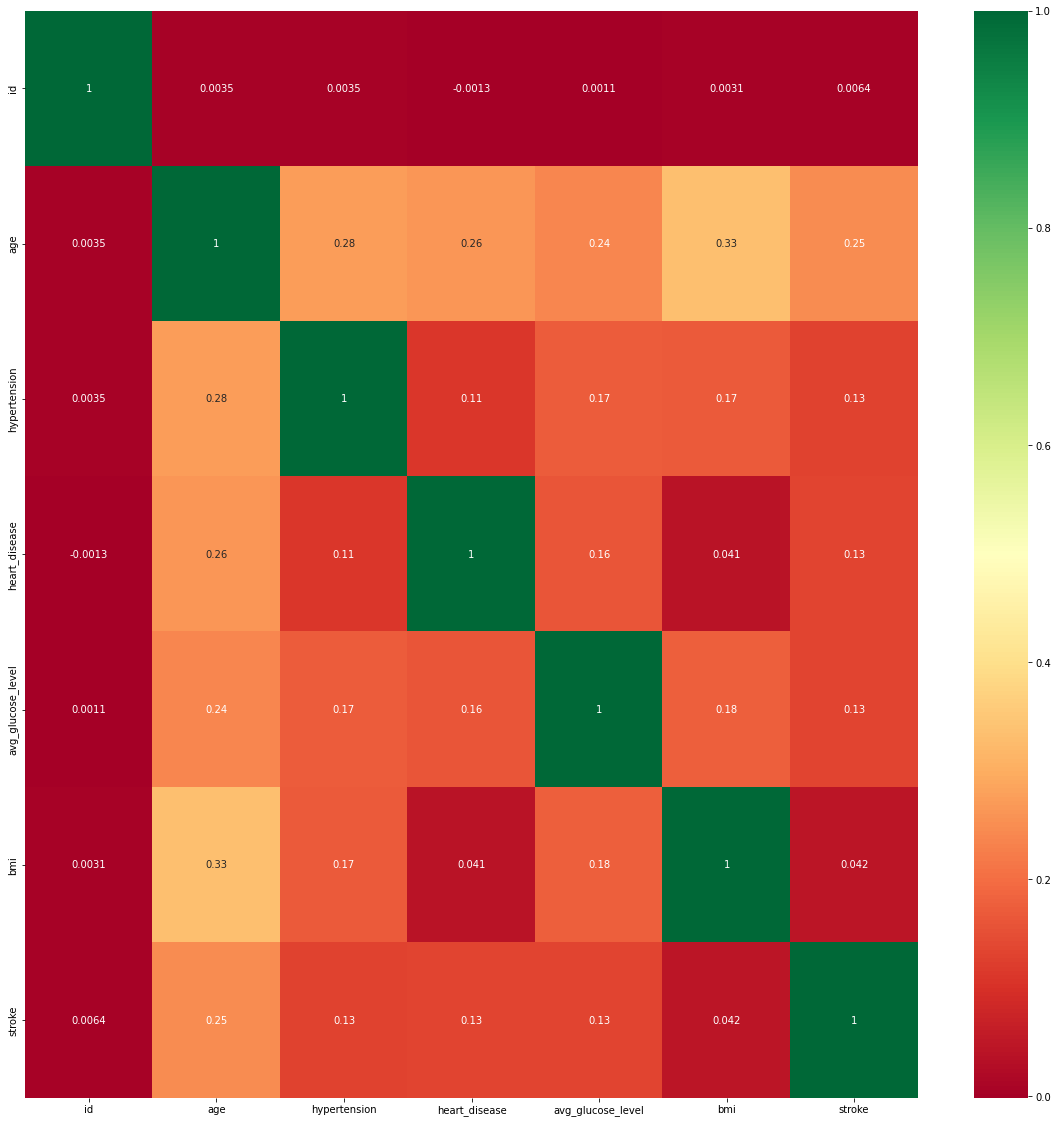

In [9]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


**HISTOGRAM**

In [14]:
df.hist

<bound method hist_frame of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

**DATA PREPROCESSING**

In [23]:
df_dummy = pd.get_dummies(df[["gender", 'Residence_type', 'smoking_status', 'work_type', "ever_married"]],
                          drop_first=True)
min_max_scaler =preprocessing.Min_Max_Scaler()
scaled_columns = min_max_scaler.fit_transform(df[["age", "avg_glucose_level", "bmi"]])
scaled_columns = pd.DataFrame(scaled_columns, columns=["age", "avg_glucose_level", "bmi"])
df = pd.concat([scaled_columns, df_dummy, df[["stroke", "hypertension", "heart_stroke"]]], axis=1)


KeyError: ignored

**IMBLANCED DATA**

In [24]:
df['stroke'].value_counts(normalize=True)


0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [25]:
df['heart_disease'].value_counts()


0    4834
1     276
Name: heart_disease, dtype: int64

In [26]:
df['smoking_status'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

**CHECKING NULL VALUES**

In [ ]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Bmi value gender wise**

In [ ]:
df.groupby(['gender'])['bmi'].agg(['mean', 'median'])


,mean,median
gender,,
Female,29.065758,27.8
Male,28.647936,28.4
Other,22.400000,22.4


**filling all null values with their gender respective median values**

In [ ]:
df.bmi[df.gender=='Female'] = df.bmi[df.gender=='Female'].fillna(27.8)
df.bmi[df.gender=='Male'] = df.bmi[df.gender=='Male'].fillna(28.4)
df.bmi[df.gender=='Other'] = df.bmi[df.gender=='Other'].fillna(22.4)


In [ ]:
df.isna().sum().sum()


0

**EXPLORATORY DATA ANALYSIS**

In [15]:
print(df.describe())


                 id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  4909.000000  5110.000000
mean   36517.829354    43.226614  ...    28.893237     0.048728
std    21161.721625    22.612647  ...     7.854067     0.215320
min       67.000000     0.080000  ...    10.300000     0.000000
25%    17741.250000    25.000000  ...    23.500000     0.000000
50%    36932.000000    45.000000  ...    28.100000     0.000000
75%    54682.000000    61.000000  ...    33.100000     0.000000
max    72940.000000    82.000000  ...    97.600000     1.000000

[8 rows x 7 columns]


In [ ]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 
                                        'ever_married', 'work_type', 'residence_type', 
                    'smoking_status', 'stroke']

numerical_cols = ['age', 'avg_glucose_level', 'bmi']


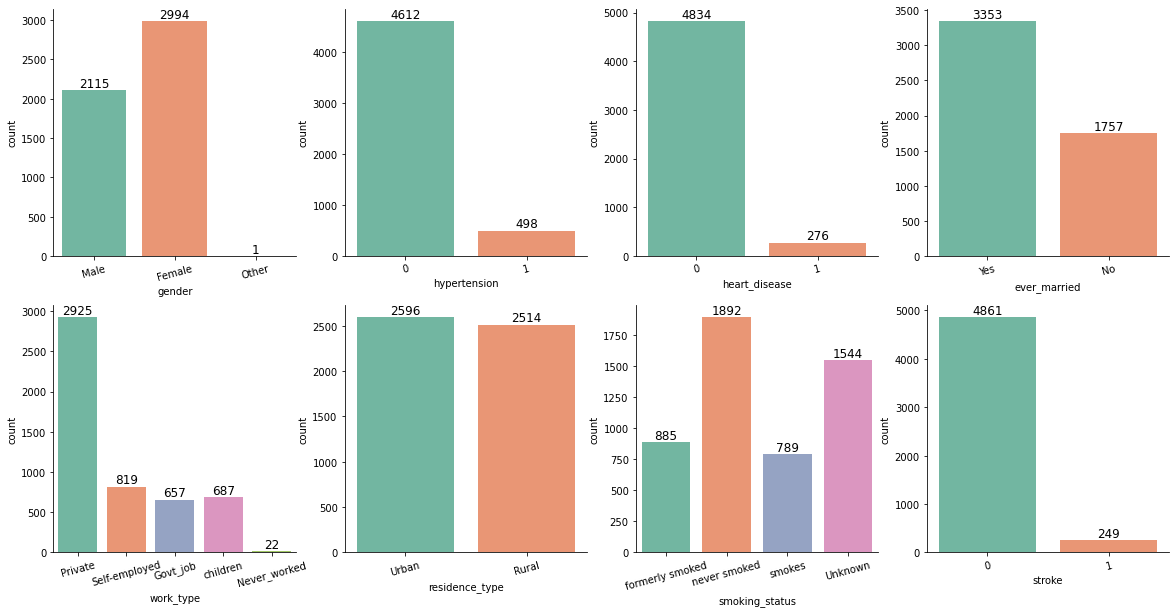

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = np.ravel(axs)
for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    g = sns.countplot(data=df, x=col, palette="Set2")
    for rect in g.patches:
        x, y = rect.get_x(), rect.get_y()
        h, w = rect.get_height(), rect.get_width()
        plt.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12, color='k')
    plt.xticks(rotation=15)
plt.show()



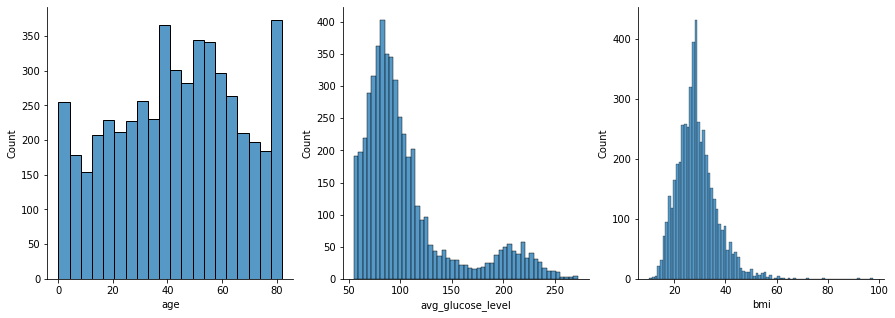

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs = np.ravel(axs)
for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, palette='Set2')
plt.show()


**dropping bmi outliers**

In [ ]:
df = df.loc[~(df.bmi>60)]
df.shape


(5097, 12)

**since "Other" gender is only one instance in the data so let's drop it**

In [ ]:
df = df.loc[~(df.gender=="Other")]


**CLEANED DATA**

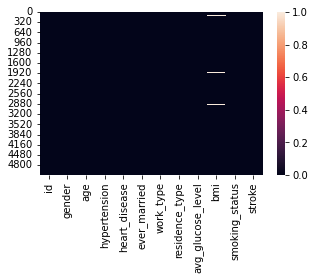

In [16]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull())
plt.show()


**DATA MAPPING**

In [ ]:
gender_map = {'Female':0, 'Male':1}
ever_married_map = {'Yes':1, 'No':0}
residence_type_map = {'Rural':0, 'Urban':1}
df.gender = df.gender.map(gender_map)
df.ever_married = df.ever_married.map(ever_married_map)
df.residence_type = df.residence_type.map(residence_type_map)


**Features and target**

In [21]:
# features and target
X, y = df.drop('stroke', 1), df.stroke.values

# getting dummy data for categorical
X = pd.get_dummies(X, drop_first=True)

# oversampling data
sm = SMOTE()
X, y = sm.fit_resample(X, y)

# getting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)



ValueError: ignored

**Getting dummy data for categorical**

In [11]:
X = pd.get_dummies(X, drop_first=True)





NameError: ignored

**oversampling data**


In [18]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)


NameError: ignored

**Getting training and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
X_train.shape, y_train.shape


((4599, 17), (4599,))

**Scaling data**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def show_model_results(model):
    """A simple function to show a model results"""
    print(f"{model.__class__.__name__:*^50}\n")
    model.fit(X_train_scaled, y_train)
    print(f"Train Acc.: {model.score(X_train_scaled, y_train)*100:.2f}%")
    print(f"Test Acc.: {model.score(X_test_scaled, y_test)*100:.2f}%")
    x = "Confusion Matrix"
    print(f"\n{x:*^30}\n")
    print(metrics.confusion_matrix(y_test, model.predict(X_test_scaled)))


**LogisticRegression**

In [13]:
log_reg = LogisticRegression()

show_model_results(log_reg)


NameError: ignored

**KNeighbors classifier**

In [ ]:
knn_clf = KNeighborsClassifier()
show_model_results(knn_clf)


***************KNeighborsClassifier***************



ValueError: ignored

**Random forest**

In [ ]:
random_forest = RandomForestClassifier(max_depth=11, min_samples_split=4, random_state=10)
show_model_results(random_forest)


**************RandomForestClassifier**************



ValueError: ignored

**GradientBoostingclassifier**

In [ ]:
gbrt_clf = GradientBoostingClassifier(random_state=10)
show_model_results(gbrt_clf)


************GradientBoostingClassifier************



ValueError: ignored

**Histgradientboostingclassifier**

In [ ]:
hist_clf = HistGradientBoostingClassifier(random_state=10)
show_model_results(hist_clf)


**********HistGradientBoostingClassifier**********

Train Acc.: 99.54%
Test Acc.: 93.35%

*******Confusion Matrix*******

[[477   9]
 [ 25   0]]


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42, probability=True))])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y)
# Our data is biased, we can fix this with SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv.mean()


NameError: ignored